In [1]:
import json

my_details = {"username":"kaushikpal2020","key":"0a176df48afab6fc1d80333e99480f33"}

with open('kaggle.json', 'w') as json_file:
    json.dump(my_details, json_file)

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d tejashvi14/engineering-placements-prediction

  0% 0.00/10.0k [00:00<?, ?B/s]
100% 10.0k/10.0k [00:00<00:00, 3.86MB/s]


In [6]:
import zipfile

z= zipfile.ZipFile('engineering-placements-prediction.zip')
z.extractall()

# Project Name: Engineering Placements Prediction

A University Announced Its On-Campus Placement Records For The Engineering Course. The Data Is From The Years 2013 And 2014.
The Following Is The College Placements Data Compiled Over 2 years. Use This Data To Predict And Analyse Whether A Student Gets Placed, Based On His/Her Background.
Perform Extensive EDAs And Bring Out Insights.

The main aim of this project is to predict the whether student will be placed on their placement or not based on various features. This is a classification type problem. Here we will apply logistic regression, knn, decision tree, svm, random forest, xgboost etc.

The purposes of this project is  to look into different features to observe their relationship, based on several features of individual such as age, stream, cgpa, gender if we can determine wherther they will be placed or not. Why this project may help someone?

Let's say someone is in First or Second year and determining how much they should study for a good cgpa or not getting backlog or moreover to get placed. One aspect can be if any individual is havn't done any inernship then should they require internship or not.

kaggle dataset [link](https://www.kaggle.com/tejashvi14/engineering-placements-prediction)


## Details about dataset

**Age**: 
```Age At The Time Of Final Year```


**Gender**: 
```Gender Of Candidate, Male or Female```

**Stream**
```Engineering Stream That The Candidate Belongs To```

```Computer Science, Information Technology, Mechanical,Electronics And Communication, Electrical, Civil```


**CGPA**:
```CGPA Till 6th Semester, Average of 6 sem's cgpa, min 0 and max 10```

**Hostel**
```Whether Student Lives In College Accomodation, 1->Yes and 0->No```

**HistoryOfBacklogs**
```Whether Student Ever Had Any Backlogs In Any Subjects, 1->Yes and 0->No```

**PlacedOrNot**
```Target Variable, 1->Yes and 0->No```


# 👨🏻‍💻 All the Lifecycle In A Data Science Projects
1. 🔥 Exploratory Data Analysis(EDA))
2. 📈 Feature Engineering
3. 📝 Feature Selection
4. 🤖 Model Building and Evaluation
5. 🎊 Deployment

### 📥 Importing libraries

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
df = pd.read_csv("collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


### 📝Metadeta about dataset

In [9]:
print(f"dataset contains {df.shape[0]} rows and {df.shape[1]}")

dataset contains 2966 rows and 8


In [10]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


##### Datatypes of each columns

In [11]:
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

## 🔥 Exploratory Data Analysis(EDA)¶
In Exploratory Data Analysis We will Analyze To Find out the below stuff

✔️ Missing Values

✔️ All The Numerical Variables

✔️ Distribution of the Numerical Variables

✔️ Categorical Variables

✔️ Cardinality of Categorical Variables

✔️ Finding outliers

✔️ Relationship between independent and dependent feature



### Missing Values

In [12]:
missing_num = df[df.columns].isna().sum().sort_values(ascending=False)

# total missing values in data frame
missing_num

PlacedOrNot          0
HistoryOfBacklogs    0
Hostel               0
CGPA                 0
Internships          0
Stream               0
Gender               0
Age                  0
dtype: int64

*Sins there are no missing values , this data frame is pretty much clean. So we don't need to deal with missing values in Feature Engineering section*

### Numerical and Categorical features/ Variables

In [13]:
numerical_cols = [col for col in df.columns if df[col].dtype!='O']
categorical_cols = [col for col in df.columns if df[col].dtype=='O']

In [14]:
print(f"Numberical columns are = {numerical_cols}")
print(f"Categorical columns are = {categorical_cols}")

Numberical columns are = ['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']
Categorical columns are = ['Gender', 'Stream']


In [15]:
continuous_cols = [col for col in numerical_cols if df[col].nunique() >= 25]
discrete_cols = [col for col in numerical_cols if df[col].nunique() < 25]

In [16]:
print(f"Continuous values features are = {continuous_cols}")
print(f"Discrete values feature is = {discrete_cols}")

Continuous values features are = []
Discrete values feature is = ['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']


*There are two types of Numerical variables :*
 * Discrete Variables
 * Continuous Variable

*But in this data frame all the feature comes in Discrete Variables beacause there are less than 25 unique values in numerical features. So we we put all togather in Numerical feature*


 ### Distribution of the Numerical Variables


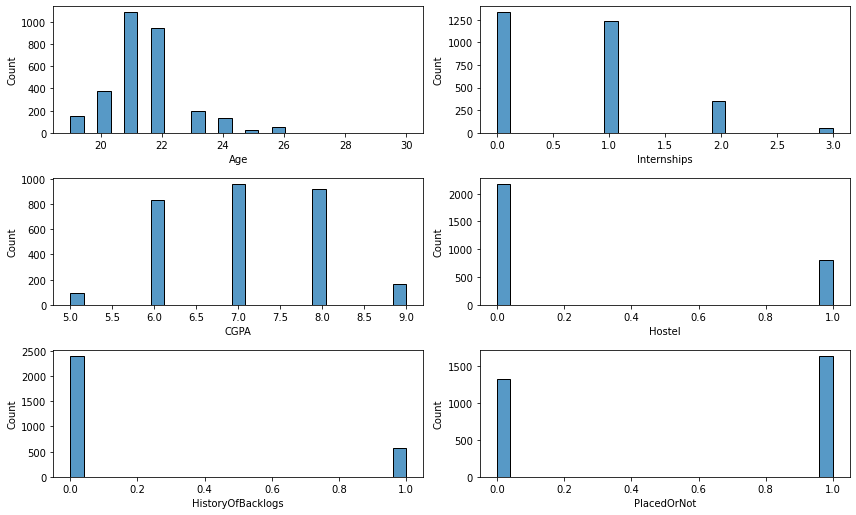

In [17]:
plt.figure(figsize=(12, 14))

for (i, col) in enumerate(discrete_cols,1):
    plt.subplot(6, 2, i)
    sns.histplot(df[col], bins=25)

plt.tight_layout()
plt.show()

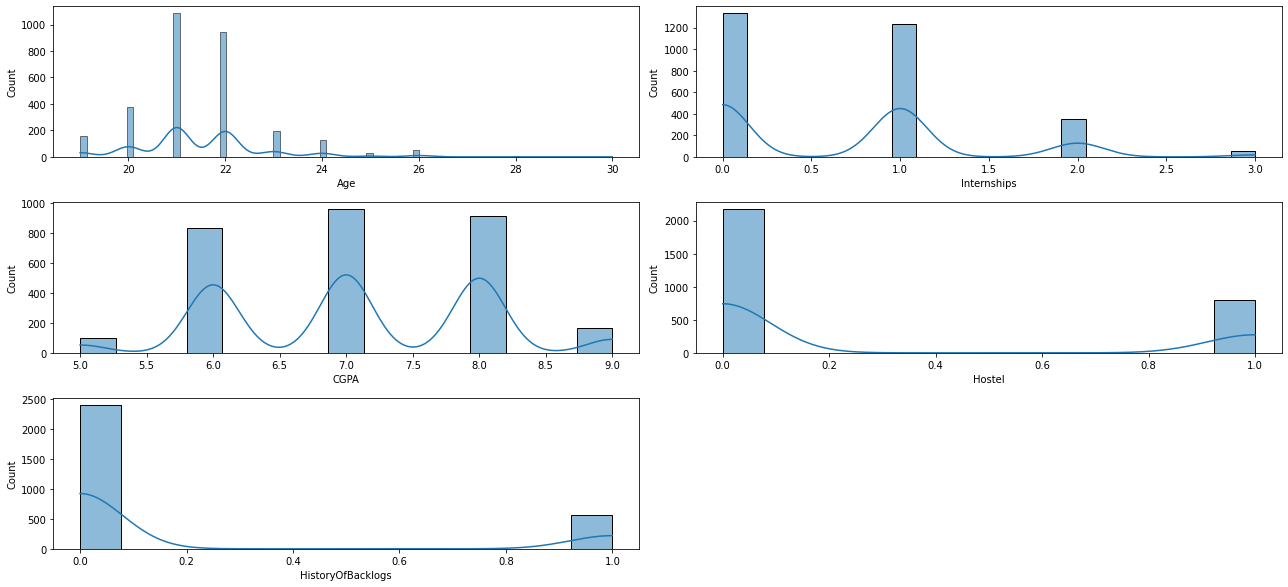

In [18]:
plt.figure(figsize=(18, 16))

for (i, col) in enumerate(numerical_cols[:-1],1):
    plt.subplot(6, 2, i)
    sns.histplot(x=df[col], kde=True)

plt.tight_layout()
plt.show()

### Categorical Variables

The dataset contains only two categorical features Gender and Stream.

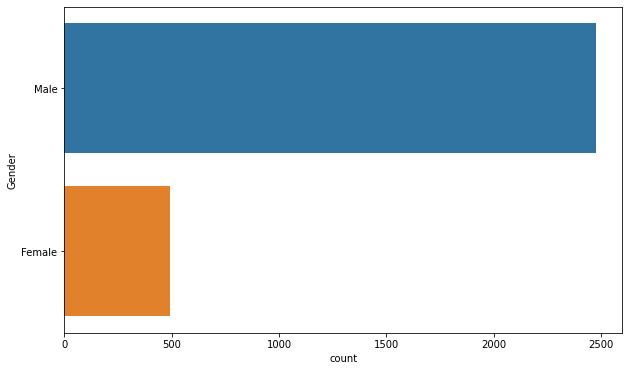

In [19]:
plt.figure(figsize=(10, 6))

sns.countplot(y = df['Gender'])

Here we can see that Number of male students are much much heigher than female students.

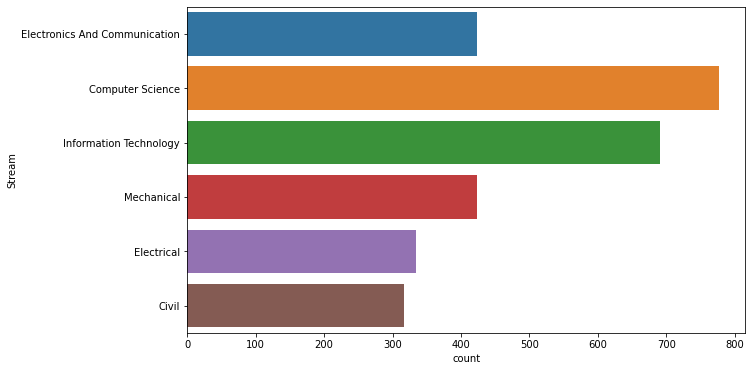

In [20]:
plt.figure(figsize=(10, 6))

sns.countplot(y = df['Stream'])

Here we can see that Computer Science stream is most popular among students

### outliers

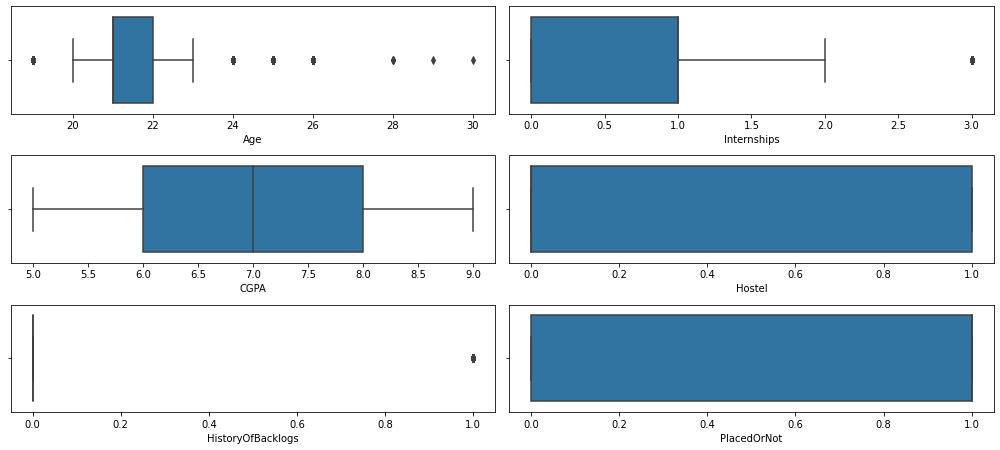

In [21]:
plt.figure(figsize=(14, 8))

count = 1
for col in numerical_cols:
    plt.subplot(4, 2, count)
    sns.boxplot(x=df[col])
    count += 1

plt.tight_layout()
plt.show()

### Hypothesis

1. Gender Vs placement


___
Here we will view the realtionship between gender and placement, whether being male or female can change their placement possibility or not.

In reality it should not show any kind of difference because of gender-eqality

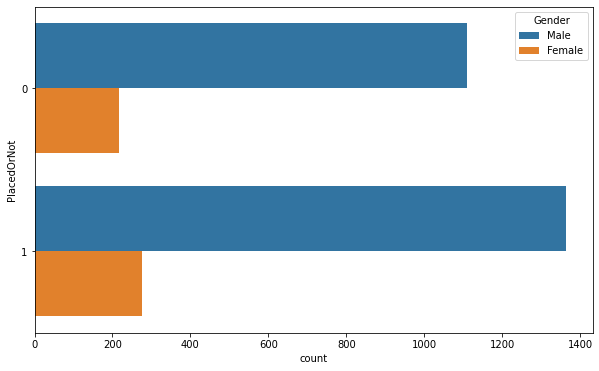

In [22]:
plt.figure(figsize=(10, 6))

sns.countplot(y = df['PlacedOrNot'], hue=df['Gender'])
plt.show()

In [23]:
df['Gender'].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

In [24]:
total_no_males = df['Gender'].value_counts()['Male']
total_no_females = df['Gender'].value_counts()['Female']

print(f"Number of male students = {total_no_males} and female students = {total_no_females}")

filt = df['PlacedOrNot'] == 1
placed_males = df[filt]['Gender'].value_counts()['Male']
placed_females = df[filt]['Gender'].value_counts()['Female']

print(f"Number students who were placed male = {placed_males} and female = {placed_females}")
print(f"Percentage of beeing placed among males = {placed_males / total_no_males * 100 : 0.2f} %")
print(f"Percentage of beeing placed among males = {placed_females / total_no_females * 100 : 0.2f} %")

Number of male students = 2475 and female students = 491
Number students who were placed male = 1364 and female = 275
Percentage of beeing placed among males =  55.11 %
Percentage of beeing placed among males =  56.01 %


2. CGPA Vs placement


___
Here We are checking if a student's CGPA is heigher than avg then can it helps in placement times

Our H0 hypothesis is it can not help. Meaning depending on someones CGPA it should not matter whether he/she be placed or not.

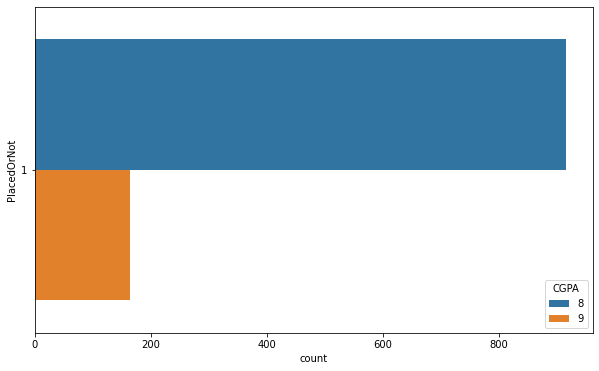

In [25]:
filt = df['CGPA'] > df['CGPA'].mean()

df_heigher_cgpa = df[filt]

plt.figure(figsize=(10, 6))

sns.countplot(y = df_heigher_cgpa['PlacedOrNot'], hue=df_heigher_cgpa['CGPA'])
plt.show()

In [26]:
filt.value_counts()

False    1886
True     1080
Name: CGPA, dtype: int64

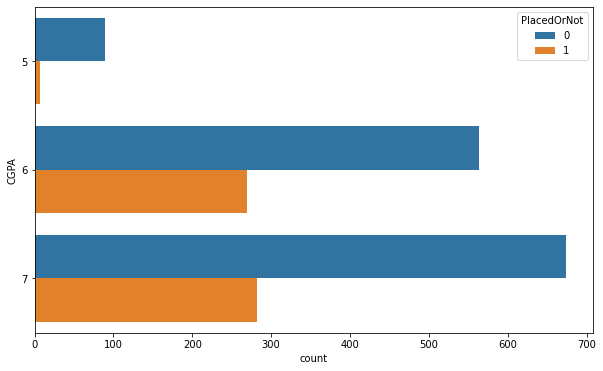

In [27]:
df_lower_cgpa = df[~filt]
plt.figure(figsize=(10, 6))

sns.countplot(y = df_lower_cgpa['CGPA'], hue=df_lower_cgpa['PlacedOrNot'])
plt.show()

As we are seeing in the plots, there is no one who haven't get placed with more than average CGPA.
And in case of lower CGPA than the average, there is huge difference between number of student have got placement and who havn't.

3. Internship Vs placement

___
Here We are checking if a student have any internship before their 6th sem can it effect their placement

Our H0 hypothesis is it can not have any effect. Meaning if a student have 0 internship and others who have multiple internships should be equally be juged.

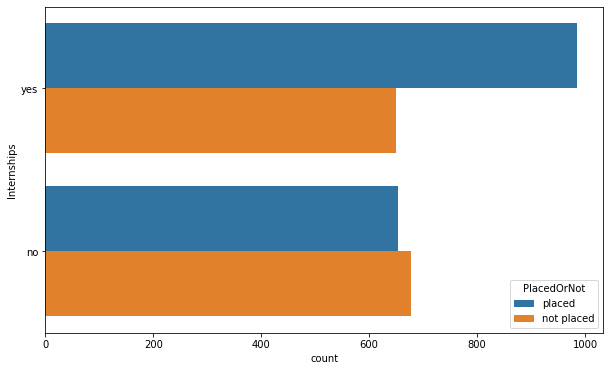

In [28]:
df_internships = df.copy()
df_internships['Internships'] = np.where(df['Internships'] >= 1, 'yes', 'no')
df_internships['PlacedOrNot'] = np.where(df['PlacedOrNot'] == 1, 'placed', 'not placed')
plt.figure(figsize=(10, 6))

sns.countplot(y = df_internships['Internships'], hue=df_internships['PlacedOrNot'])
plt.show()

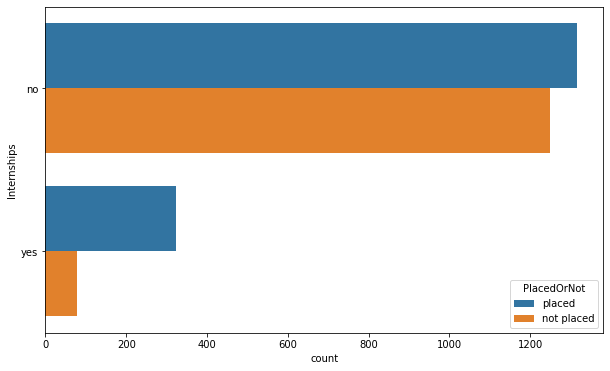

In [29]:
df_internships = df.copy()
df_internships['Internships'] = np.where(df['Internships'] >= 2, 'yes', 'no')
df_internships['PlacedOrNot'] = np.where(df['PlacedOrNot'] == 1, 'placed', 'not placed')
plt.figure(figsize=(10, 6))

sns.countplot(y = df_internships['Internships'], hue=df_internships['PlacedOrNot'])
plt.show()

We are not getting any idea by plotting the graph between 'No internship taker' and 'At least one internship taker'.
So we plotted a graph between 'zero or one internship taker' and 'atleast two internship taker', it shows a huge improvement in getting placement.

4. Backlog Vs Placement


___
Here We are checking if a student have any backlog before their 6th sem and can it effect their placement

Our H0 hypothesis is it can not have any effect. Meaning if a student have backlogs and others who have no backlog should be equally be juged.

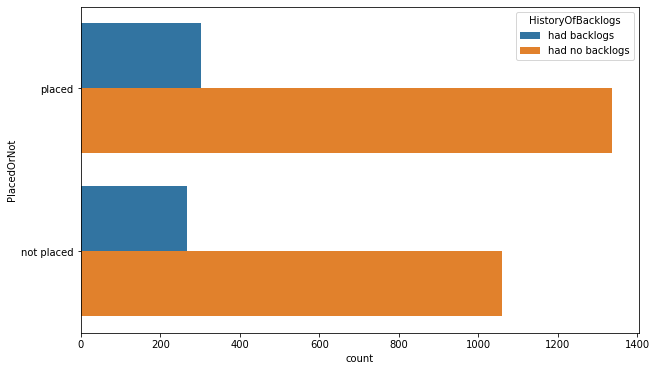

In [30]:
df_backlog = df.copy()
df_backlog['PlacedOrNot'] = np.where(df['PlacedOrNot'] == 1, 'placed', 'not placed')
df_backlog['HistoryOfBacklogs'] = np.where(df['HistoryOfBacklogs'] >= 1, 'had backlogs', 'had no backlogs')

plt.figure(figsize=(10, 6))

sns.countplot(y = df_backlog['PlacedOrNot'], hue=df_backlog['HistoryOfBacklogs'])
plt.show()

It has no relation between placement and backlog. 

6. Stream Vs Placement


___
Here We are checking if the student have any difference in chance of placement based on their respective branch.

Our H0 hypothesis is 

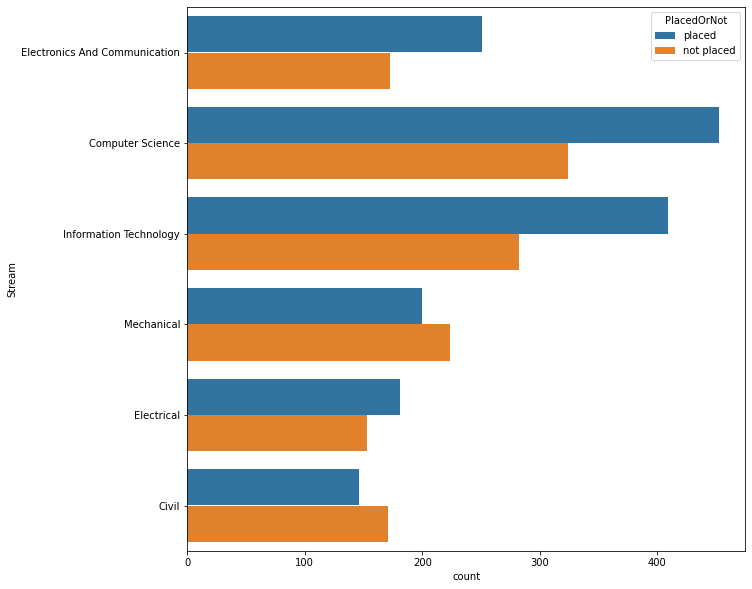

In [31]:
df_stream = df.copy()
df_stream['PlacedOrNot'] = np.where(df['PlacedOrNot'] == 1, 'placed', 'not placed')

plt.figure(figsize=(10, 10))

sns.countplot(y = df_stream['Stream'], hue=df_stream['PlacedOrNot'])
plt.show()

In [32]:
df['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Mechanical                       424
Electronics And Communication    424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [33]:
df.groupby(['PlacedOrNot'])['Stream'].value_counts(normalize=True)

PlacedOrNot  Stream                       
0            Computer Science                 0.244160
             Information Technology           0.212509
             Mechanical                       0.168802
             Electronics And Communication    0.130369
             Civil                            0.128862
             Electrical                       0.115298
1            Computer Science                 0.275778
             Information Technology           0.249542
             Electronics And Communication    0.153142
             Mechanical                       0.122026
             Electrical                       0.110433
             Civil                            0.089079
Name: Stream, dtype: float64

In [34]:
df[df['PlacedOrNot']==1]['Stream'].value_counts() / df['Stream'].value_counts() * 100

Civil                            46.056782
Computer Science                 58.247423
Electrical                       54.191617
Electronics And Communication    59.198113
Information Technology           59.189580
Mechanical                       47.169811
Name: Stream, dtype: float64

Our observation is, 

2. Hostel Vs placement


___
Here We are checking if a student have any internship before their 6th sem can it effect their placement

Our H0 hypothesis is it can not have any effect. Meaning if a student have 0 internship and others who have multiple internships should be equally be juged.

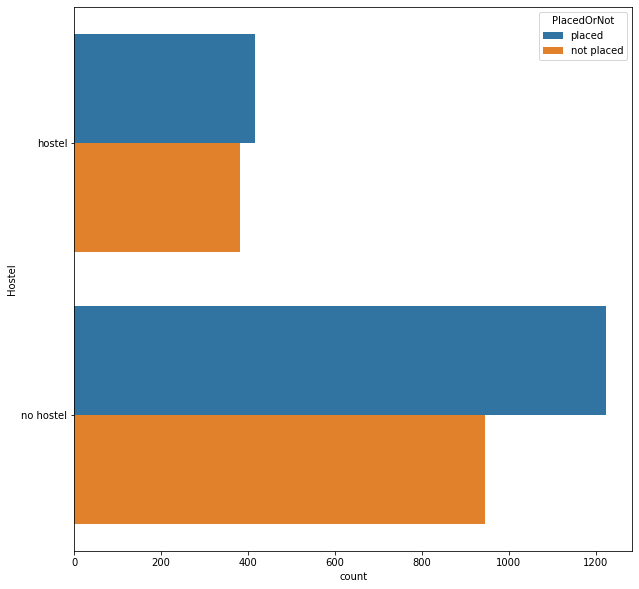

In [35]:
df_hostel = df.copy()
df_hostel['PlacedOrNot'] = np.where(df['PlacedOrNot'] == 1, 'placed', 'not placed')
df_hostel['Hostel'] = np.where(df['Hostel'] == 1, 'hostel', 'no hostel')

plt.figure(figsize=(10, 10))

sns.countplot(y = df_hostel['Hostel'], hue=df_hostel['PlacedOrNot'])
plt.show()

2. Age Vs placement


___
Here We are checking if a student have any internship before their 6th sem can it effect their placement

Our H0 hypothesis is it can not have any effect. Meaning if a student have 0 internship and others who have multiple internships should be equally be juged.

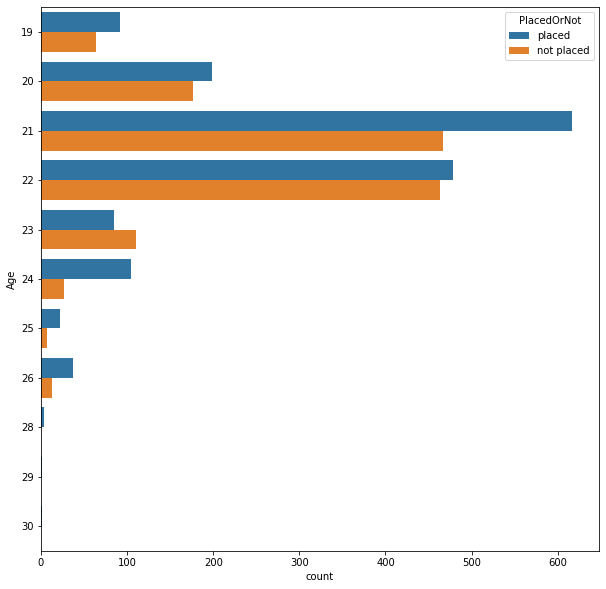

In [36]:
df_age = df.copy()

df_age['Age'] = np.where(df_age['Age'] > df_age['Age'].mean(), 'heigher age', 'lower age')
df_hostel['PlacedOrNot'] = np.where(df['PlacedOrNot'] == 1, 'placed', 'not placed')

plt.figure(figsize=(10, 10))

sns.countplot(y = df_hostel['Age'], hue=df_hostel['PlacedOrNot'])
plt.show()


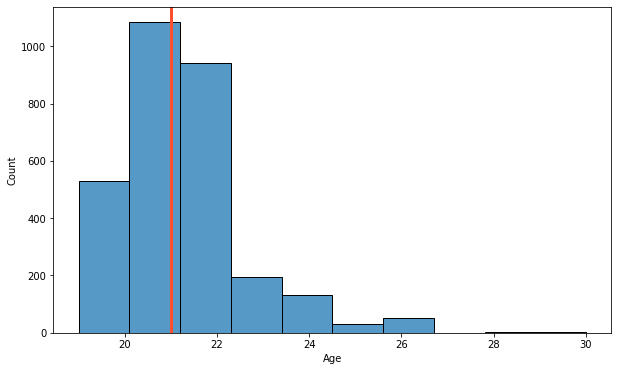

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde= False, bins=10)
plt.axvline(df['Age'].median(), color = '#fc4f30', label = 'Median age', linewidth = 3)
plt.show()

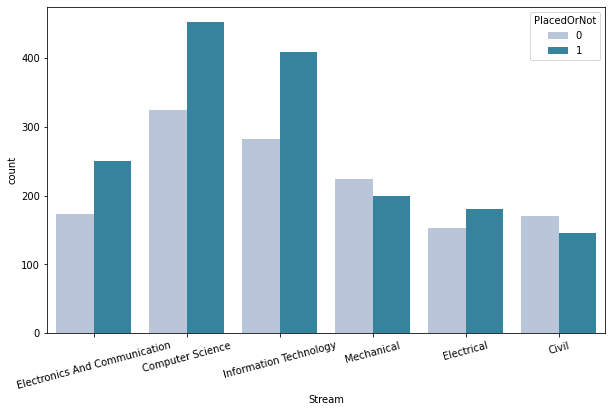

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stream',hue='PlacedOrNot',palette="PuBuGn",data=df)
plt.xticks(rotation=15)
plt.show()

As we are seeing **Civil and Mechanical** branch have higher count of not getting placement than getting a placement.

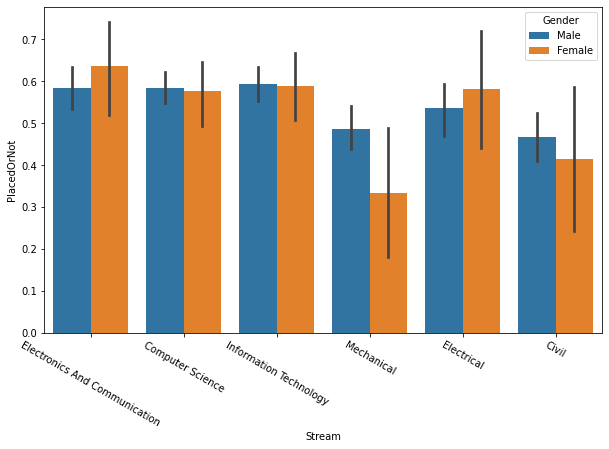

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Stream',y='PlacedOrNot',hue='Gender',data=df)
plt.xticks(rotation=-30)
plt.show()

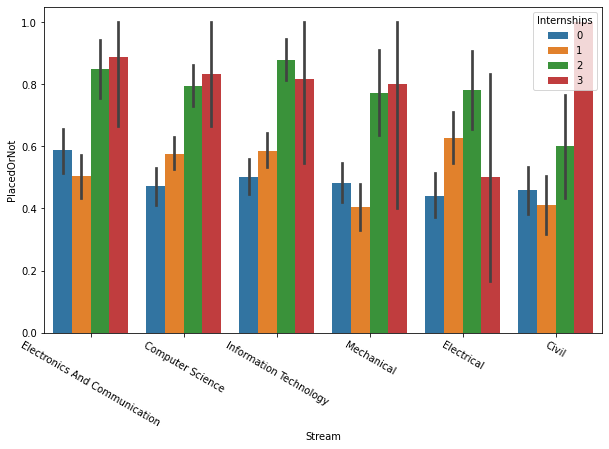

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Stream',y='PlacedOrNot',hue='Internships',data=df)
plt.xticks(rotation=-30)
plt.show()

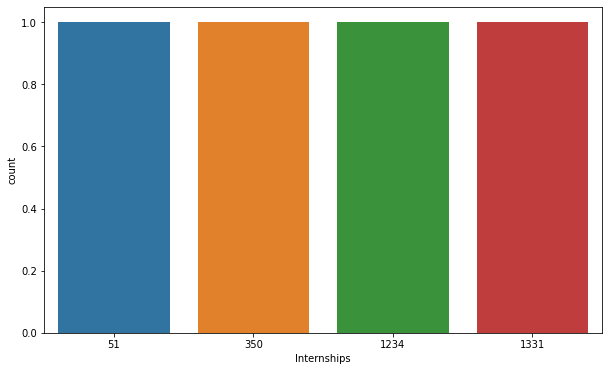

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Internships'].value_counts(),data=df)

### checking for multi-colinearity

In [42]:
df.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


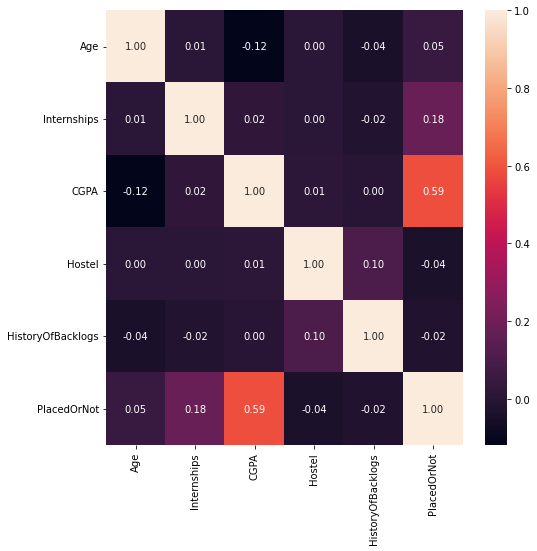

In [43]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f')

In this plot more common values or higher activities are in brighter colors and less common or activity value are in darker colors

Now we will analysis each numerical feature one by one and find out how it olter the possibality that a student will get placement or not

First we will check the first numerical feature age. We will count how same age are there

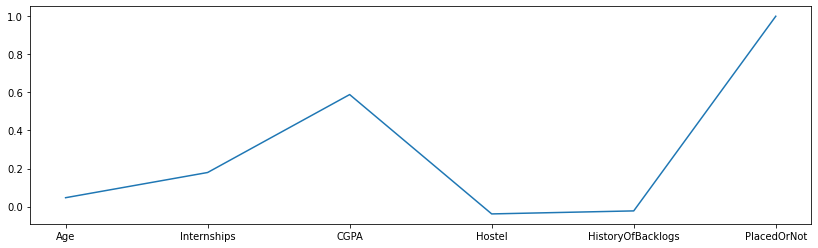

In [45]:
plt.figure(figsize=(14, 4))
plt.plot(df.corr()['PlacedOrNot'])

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

calc_vif(df[numerical_cols[:-1]])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variables,VIF
0,Age,42.209255
1,Internships,1.903508
2,CGPA,41.736787
3,Hostel,1.383046
4,HistoryOfBacklogs,1.249034


'CGPA', 'Age' these features are having very high VIF score which is not good. Because high VIF > 10 meaning multi-colinearity exist in data. Multi-Colinearity is very bad thing not only for regression but also for classification. So we will drop these columns and lets see how it affected others VIF score again

In [47]:
df_cpy = df.drop('CGPA', axis=1)
calc_vif(df_cpy[['Age', 'Internships', 'Hostel', 'HistoryOfBacklogs']])

,variables,VIF
0,Age,2.445461
1,Internships,1.899263
2,Hostel,1.382058
3,HistoryOfBacklogs,1.247805


So just removing CGPA all others VIF score is now under 10 which is good for our model.

## 📈 Feature Engineering
In Feature Engineering We will be handling To Find out the below stuff

- Filling Missing values(numerical and categorical)
- removing outliers from dataset
- transform data to normal distribution(only continuous values)
- scaling values(continuous values)
- performing categorical encoding(One-Hot encoding)

### Filling Missing values

____

Because the dataset doesn't contain any missing values thats why there is no need to apply any methods

### removing outliers from dataset

___
Only `Age` column containing outliers.

In [48]:
import scipy.stats as stat
import pylab 


def plot_data(df,feature):
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1,2,1)
    plt.title(col)
    df[feature].hist()
    
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab) # QQ plot
    
    plt.tight_layout()
    plt.show()

In [49]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


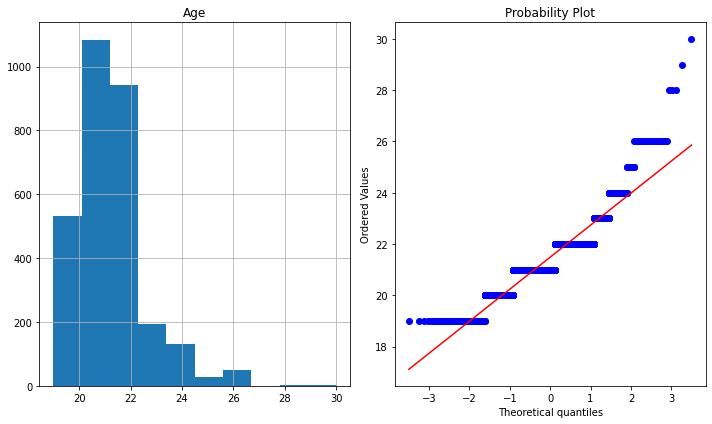

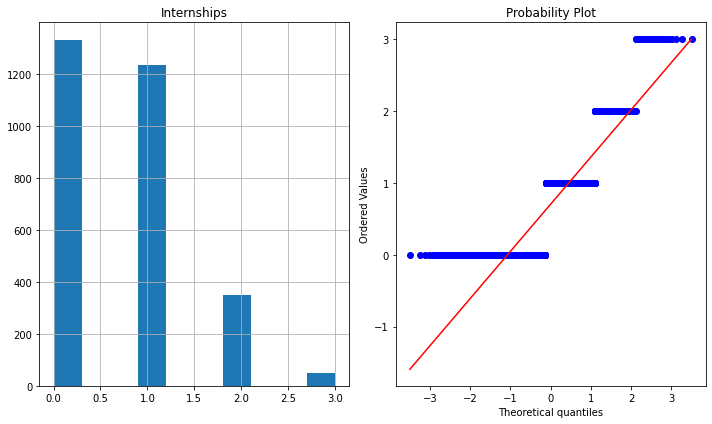

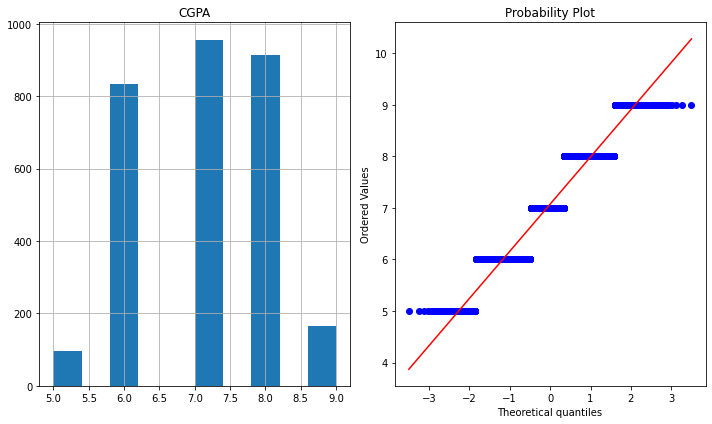

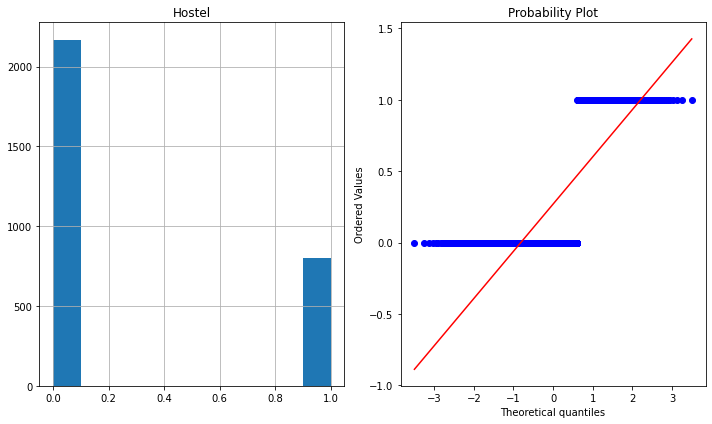

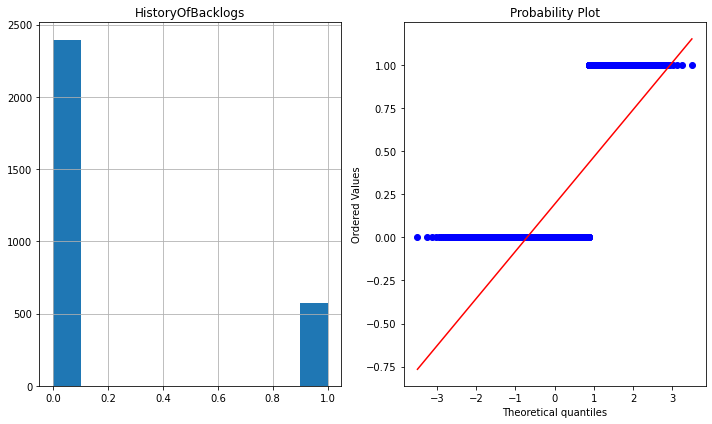

In [50]:
for col in numerical_cols[:-1]:
    plot_data(df, col)

In [51]:
def remove_outliers_non_normal(df, feature, CONST=1.75):
    plt.figure(figsize=(8, 4))
    newName =  feature + "_copy" 
    
    df[newName] = df[feature].copy()


    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=50)
    plt.title('Before removing outliers')

    # ================================================================
    # removing outliers from non-normal distribution
    IQR = df[newName].quantile(0.75) - df[newName].quantile(0.25)
    lower_boundary = df[newName].quantile(0.25)-(IQR*CONST)
    uppper_boundary = df[newName].quantile(0.75)+(IQR*CONST)
    
    print(df[feature].describe())
    print(f"lower_boundary={lower_boundary} and uppper_boundary={uppper_boundary}")
    
    filt_left = df[newName] <= lower_boundary
    filt_right = df[newName] >= uppper_boundary

    df.loc[filt_left , newName] = lower_boundary
    df.loc[filt_right , newName] = uppper_boundary
    # ================================================================

    plt.subplot(1, 2, 2)
    sns.histplot(df[newName], bins=50)
    plt.title(newName)

    plt.show()
    
    
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[feature])
    plt.title('before')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[newName])
    plt.title('after')

    plt.show()
    
    return newName 

count    2966.000000
mean       21.485840
std         1.324933
min        19.000000
25%        21.000000
50%        21.000000
75%        22.000000
max        30.000000
Name: Age, dtype: float64
lower_boundary=19.5 and uppper_boundary=23.5


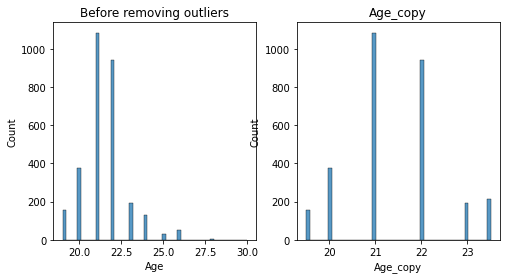

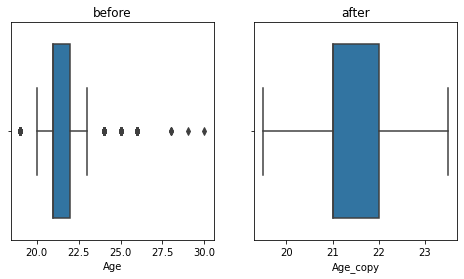

'Age_copy'

In [52]:
remove_outliers_non_normal(df, 'Age', 1.50)

In [53]:
df['Age'] = df['Age_copy']
df.drop('Age_copy', axis=1, inplace=True)

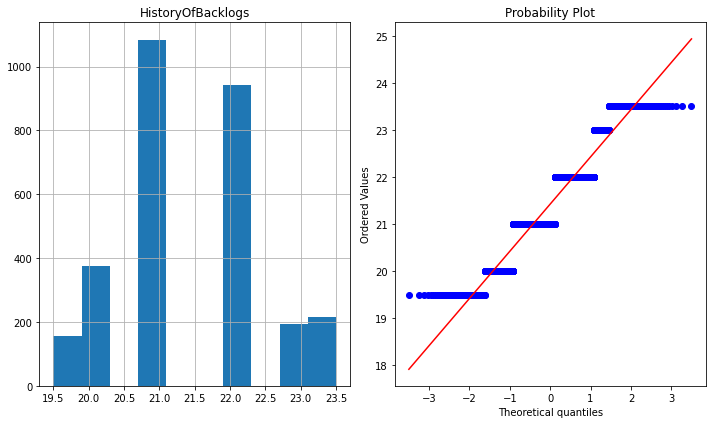

In [54]:
plot_data(df, 'Age')

### Train Test Split

before scaling values i must split it into train and test test to avoid data leakage.

#### performing categorical encoding(One-Hot encoding)

applying one-hot encoding on `'Gender','Stream'` columns

In [55]:
df = pd.get_dummies(df, columns=['Gender','Stream'], drop_first=True)
df.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Male,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22.0,1,8,1,1,1,1,0,0,1,0,0
1,21.0,0,7,1,1,1,0,1,0,0,0,0
2,22.0,1,6,0,0,1,0,0,0,0,1,0
3,21.0,0,8,0,1,1,1,0,0,0,1,0
4,22.0,0,8,1,0,1,1,0,0,0,0,1


In [56]:
X = df.drop('PlacedOrNot', axis=1)
y = df['PlacedOrNot']

In [57]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [58]:
print(f"X_train.shape={X_train.shape}")
print(f"X_test.shape={X_test.shape}")
print(f"y_train.shape={y_train.shape}")
print(f"y_test.shape={y_test.shape}")

X_train.shape=(1987, 11)
X_test.shape=(979, 11)
y_train.shape=(1987,)
y_test.shape=(979,)


### scaling values

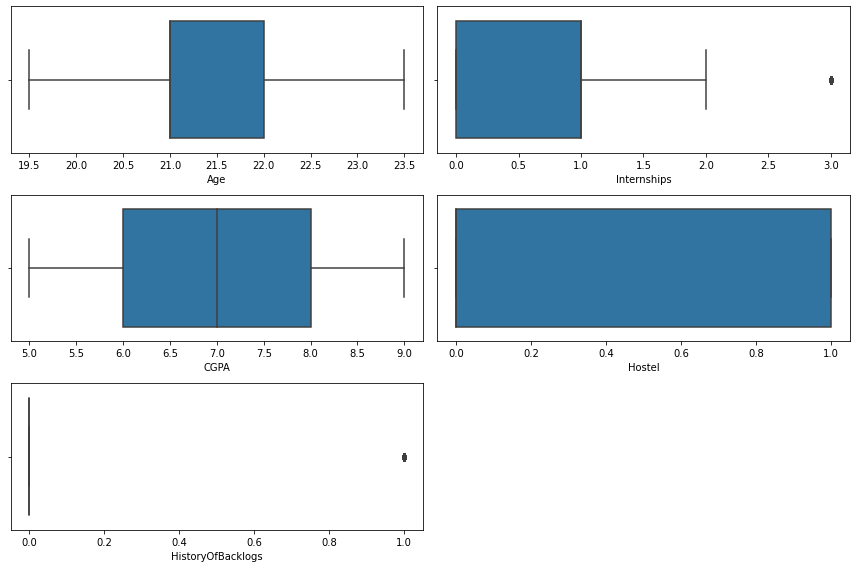

In [59]:
plt.figure(figsize=(12, 8))

count = 1
for col in numerical_cols[:-1]:
    plt.subplot(3, 2, count)
    sns.boxplot(x=df[col])
    count += 1

plt.tight_layout()
plt.show()

In X_train `internships, HistoryOfBacklogs` containing outliers so we will use robust scaler onl for bmi and rest use standardization.

### transform data to normal distribution(only continuous values)

___
Here only Age was continuous and it is already following normal distribution, so no need to apply any methods here

### scaling values(continuous values)

In [60]:
pip install xgboost

In [61]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=0)

In [62]:
xgb_cl.fit(X_train, y_train, verbose=True, eval_metric='auc', eval_set=[(X_test, y_test)],
           early_stopping_rounds=20)

[0]	validation_0-auc:0.911025
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.911025
[2]	validation_0-auc:0.911159
[3]	validation_0-auc:0.911159
[4]	validation_0-auc:0.911159
[5]	validation_0-auc:0.911159
[6]	validation_0-auc:0.911125
[7]	validation_0-auc:0.911159
[8]	validation_0-auc:0.911832
[9]	validation_0-auc:0.911798
[10]	validation_0-auc:0.912216
[11]	validation_0-auc:0.915155
[12]	validation_0-auc:0.915155
[13]	validation_0-auc:0.919644
[14]	validation_0-auc:0.920188
[15]	validation_0-auc:0.927584
[16]	validation_0-auc:0.92772
[17]	validation_0-auc:0.931562
[18]	validation_0-auc:0.931409
[19]	validation_0-auc:0.931702
[20]	validation_0-auc:0.931311
[21]	validation_0-auc:0.93132
[22]	validation_0-auc:0.931269
[23]	validation_0-auc:0.931328
[24]	validation_0-auc:0.931239
[25]	validation_0-auc:0.931303
[26]	validation_0-auc:0.931248
[27]	validation_0-auc:0.930104
[28]	validation_0-auc:0.930134
[29]	validation_0-auc:0.930129
[30]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=1, verbosity=1)

In [63]:
from sklearn.metrics import classification_report

In [64]:
y_pred = xgb_cl.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       426
           1       0.93      0.84      0.88       553

    accuracy                           0.87       979
   macro avg       0.87      0.88      0.87       979
weighted avg       0.88      0.87      0.87       979



In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       426
           1       0.93      0.84      0.88       553

    accuracy                           0.87       979
   macro avg       0.87      0.88      0.87       979
weighted avg       0.88      0.87      0.87       979



In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       426
           1       0.93      0.84      0.88       553

    accuracy                           0.87       979
   macro avg       0.87      0.88      0.87       979
weighted avg       0.88      0.87      0.87       979



In [68]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

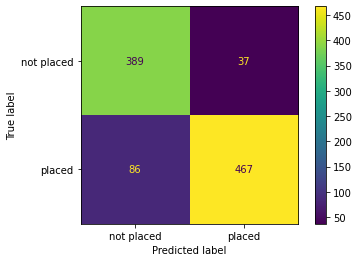

In [69]:
plot_confusion_matrix(xgb_cl, X_test, y_test, values_format='d',
                      display_labels=['not placed', 'placed'])

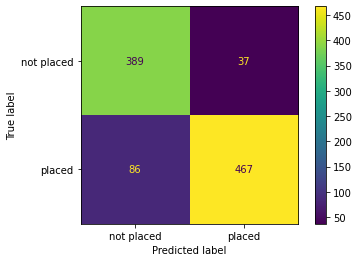

In [70]:
plot_confusion_matrix(xgb_cl, X_test, y_test, values_format='d',
                      display_labels=['not placed', 'placed'])

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid1 = {
            'max_depth':[3, 4, 5],
            'learning_rate':[0.01, 0.013, 0.15, 0.2],
            'gamma':[0, 0.1, 0.25, 0.5],
            'reg_lamda':[0, 0.25, 0.5, 1],
            'scale_pos_weight':[1, 3, 5],
            'subsample': [0.5, 0.75, 0.9]
}

In [73]:
param_grid2 = {
            'max_depth':[5],
            'learning_rate':[0.2],
            'gamma':[0],
            'reg_lamda':[10, 20, 40, 60, 100],
            'scale_pos_weight':[1]
}

In [74]:
from sklearn.model_selection import KFold

In [75]:
kfold = KFold(10)

In [76]:
optimal_params = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=0, subsample=0.9, colsample_bytree=0.5),
                            param_grid=param_grid1,
                            verbose=0,
                            n_jobs=-1,
                            cv=10)

In [77]:
optimal_params.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.5, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=0, silent=None,
                                     subsample=0.9, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.25, 0.5],
                         'learning_rate': [0.01, 0.013, 0.15, 0.2],
            

In [78]:
optimal_params.fit(X_train, y_train)
print(optimal_params.best_score_)
print(optimal_params.best_params_)
print(optimal_params.best_estimator_)

0.8822470940561393
{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'reg_lamda': 0, 'scale_pos_weight': 1, 'subsample': 0.9}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, reg_lamda=0, scale_pos_weight=1,
              seed=0, silent=None, subsample=0.9, verbosity=1)


In [79]:
xgb_cl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, reg_lamda=0, scale_pos_weight=1,
              seed=0, silent=None, subsample=0.9, verbosity=1)

xgb_cl.fit(X_train, y_train, verbose=True, eval_metric='auc', eval_set=[(X_test, y_test)],
           early_stopping_rounds=20)

[0]	validation_0-auc:0.637922
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.929431
[2]	validation_0-auc:0.931568
[3]	validation_0-auc:0.931165
[4]	validation_0-auc:0.934024
[5]	validation_0-auc:0.935085
[6]	validation_0-auc:0.934705
[7]	validation_0-auc:0.937783
[8]	validation_0-auc:0.938428
[9]	validation_0-auc:0.936437
[10]	validation_0-auc:0.935066
[11]	validation_0-auc:0.93538
[12]	validation_0-auc:0.936637
[13]	validation_0-auc:0.93652
[14]	validation_0-auc:0.937233
[15]	validation_0-auc:0.937416
[16]	validation_0-auc:0.936596
[17]	validation_0-auc:0.936927
[18]	validation_0-auc:0.936613
[19]	validation_0-auc:0.936562
[20]	validation_0-auc:0.936773
[21]	validation_0-auc:0.937893
[22]	validation_0-auc:0.936976
[23]	validation_0-auc:0.936815
[24]	validation_0-auc:0.93729
[25]	validation_0-auc:0.938364
[26]	validation_0-auc:0.937634
[27]	validation_0-auc:0.938462
[28]	validation_0-auc:0.938878
[29]	validation_0-auc:0.939493
[30]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, reg_lamda=0, scale_pos_weight=1,
              seed=0, silent=None, subsample=0.9, verbosity=1)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       426
           1       0.93      0.84      0.88       553

    accuracy                           0.87       979
   macro avg       0.87      0.88      0.87       979
weighted avg       0.88      0.87      0.87       979



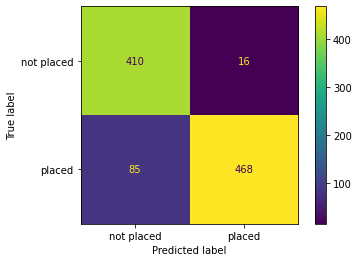

In [80]:
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_cl, X_test, y_test, values_format='d',
                      display_labels=['not placed', 'placed'])